## Importing libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from keras.models import load_model

from tensorflow import keras

# Gathering Dataset

### Loading the Data

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
# print(x_train[1])
print(x_train.shape[0])

shape of x_train:  (60000, 28, 28)
shape of x_test:  (10000, 28, 28)
60000


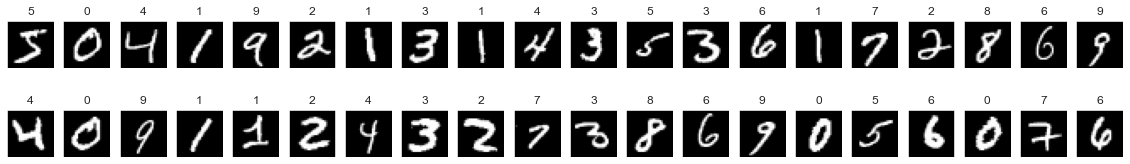

In [3]:
fig = plt.figure(figsize=(20,3))
for i in range(40):
    ax = fig.add_subplot(2, 20, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap='gray')
    ax.set_title(y_train[i])

### Checking the shape of input data

In [4]:
img_shape = x_train.shape[1:]
print(img_shape)

(28, 28)


### Build the ANN model

In [5]:
model_ann = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

### Compile and train the model

In [6]:
model_ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
r = model_ann.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2951 - accuracy: 0.9144 - val_loss: 0.1340 - val_accuracy: 0.9610
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1431 - accuracy: 0.9570 - val_loss: 0.1017 - val_accuracy: 0.9674
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1082 - accuracy: 0.9678 - val_loss: 0.0879 - val_accuracy: 0.9733
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0890 - accuracy: 0.9723 - val_loss: 0.0733 - val_accuracy: 0.9790
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0762 - accuracy: 0.9758 - val_loss: 0.0731 - val_accuracy: 0.9763
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0659 - accuracy: 0.9786 - val_loss: 0.0713 - val_accuracy: 0.9777
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0592 - accuracy: 0.9805 - val_loss: 0.0735 - val_accuracy:

Plotting Loss per Iteration

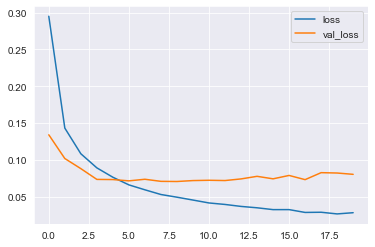

In [8]:
plt.plot(r.history['loss'], label= 'loss')
plt.plot(r.history['val_loss'], label= 'val_loss')
plt.legend()
plt.show()

Plotting Accuracy per Iteration

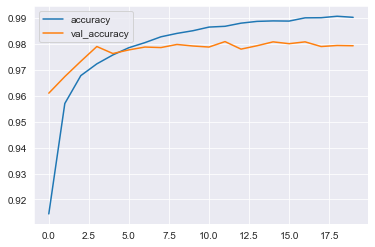

In [9]:
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label= 'val_accuracy')
plt.legend()
plt.show()

In [10]:
print(model_ann.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0802 - accuracy: 0.9793
[0.08019138872623444, 0.9793000221252441]


## Building the CNN model

In [11]:
x_train_cnn = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test_cnn = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

# y_train_cnn = y_train.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], 1))
# y_test_cnn = y_test.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], 1))

cnn_shape = x_train_cnn.shape[1:]
print(cnn_shape)

(28, 28, 1)


In [12]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3,3), activation='relu', input_shape= cnn_shape))
model_cnn.add(MaxPool2D((2,2)))
model_cnn.add(Conv2D(48, (3,3), activation='relu'))
model_cnn.add(MaxPool2D((2,2)))
model_cnn.add(Dropout(0.5))
model_cnn.add(Flatten())
model_cnn.add(Dense(500, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))

In [13]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 48)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1200)             

In [14]:
plot_model(model_cnn, 'model_cnn.jpg', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [16]:
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

r2 = model_cnn.fit(x_train_cnn, y_train, epochs=10, batch_size=128, verbose=1, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 18s 41ms/step - loss: 0.0254 - accuracy: 0.9917 - val_loss: 0.0267 - val_accuracy: 0.9942
Epoch 2/10
422/422 [==============================] - 17s 40ms/step - loss: 0.0235 - accuracy: 0.9920 - val_loss: 0.0258 - val_accuracy: 0.9940
Epoch 3/10
422/422 [==============================] - 24s 57ms/step - loss: 0.0204 - accuracy: 0.9933 - val_loss: 0.0346 - val_accuracy: 0.9907
Epoch 4/10
422/422 [==============================] - 31s 74ms/step - loss: 0.0205 - accuracy: 0.9930 - val_loss: 0.0274 - val_accuracy: 0.9927
Epoch 5/10
422/422 [==============================] - 16s 38ms/step - loss: 0.0182 - accuracy: 0.9939 - val_loss: 0.0291 - val_accuracy: 0.9928
Epoch 6/10
422/422 [==============================] - 17s 41ms/step - loss: 0.0169 - accuracy: 0.9939 - val_loss: 0.0248 - val_accuracy: 0.9932
Epoch 7/10
422/422 [==============================] - 16s 38ms/step - loss: 0.0156 - accuracy: 0.9948 - val_loss: 0.0262 - val_accuracy:

In [17]:
loss, accuracy = model_cnn.evaluate(x_test_cnn, y_test, verbose=1)
print(accuracy*100)

313/313 [==============================] - 2s 5ms/step - loss: 0.0267 - accuracy: 0.9915
99.15000200271606
